In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split, cross_validate,
                                     GridSearchCV)
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, PrecisionRecallDisplay)

# Make this notebook's output stable across runs
np.random.seed(1)

# For plotting nice figures
%matplotlib inline
sns.set()
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Load data
X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True,
                             as_frame=False)
X.shape

(70000, 784)

In [3]:
# Take random subset of data for quicker processing
sample = np.random.choice(X.shape[0], 5000)
X = X[sample]
y = y[sample]

X.shape

(5000, 784)

In [4]:
# The image resolution is 28x28

# The image is black and white,
# so each pixel has a single "color" value

# Therefore, there are 784 features

28*28

784

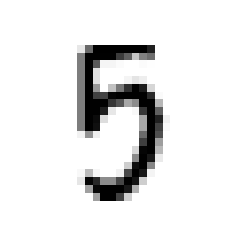

In [5]:
# Let's look at the third digit in the X data
some_digit = X[2]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
with np.printoptions(threshold=np.inf, edgeitems=10, linewidth=1000,
                     formatter=dict(float=lambda x: "%3.0f" % x)):
    print(X[0].reshape(28, 28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  92 235  38  15  97 144 144  84   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 118 253 253  86 196 254 253 253 247  91   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  46 244 253 253 235 253 198 154 193 253 220  22   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 161 253 252 163 219 147   5   6  70 249 25

In [7]:
X.shape

(5000, 784)

In [8]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000)

In [9]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [ ]:
Binary

In [10]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
y_train_5[1:20]

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False])

In [11]:
# Evaluate k-Nearest Neighbors for binary "is a 5?" with k = 1
knn_clf = KNeighborsClassifier(n_neighbors=1)
cv_results = cross_validate(knn_clf, X_train, y_train_5, cv=4,
                            scoring=['accuracy', 'precision', 'recall'])

print((f'Accuracy: {cv_results["test_accuracy"].mean():.4f}\n'
       f'Precision: {cv_results["test_precision"].mean():.4f}\n'
       f'Recall: {cv_results["test_recall"].mean():.4f}'))

Accuracy: 0.9865
Precision: 0.9305
Recall: 0.9140


In [12]:
# Evaluate k-Nearest Neighbors for binary "is a 5?" with k = 10
knn_clf = KNeighborsClassifier(n_neighbors=10)
cv_results = cross_validate(knn_clf, X_train, y_train_5, cv=4,
                            scoring=['accuracy', 'precision', 'recall'])

print((f'Accuracy: {cv_results["test_accuracy"].mean():.4f}\n'
       f'Precision: {cv_results["test_precision"].mean():.4f}\n'
       f'Recall: {cv_results["test_recall"].mean():.4f}'))

Accuracy: 0.9845
Precision: 0.9704
Recall: 0.8480


Hyperparamter grid search

In [13]:
parameters = {
    'n_neighbors':range(1, 51)
}

knn_clf = KNeighborsClassifier()
grid = GridSearchCV(knn_clf, param_grid=parameters,
                    scoring='accuracy')
grid.fit(X_train, y_train_5)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)}, scoring='accuracy')

In [14]:
print(f'Accuracy: {grid.best_score_:.3f}')
grid.best_params_

Accuracy: 0.988


{'n_neighbors': 5}

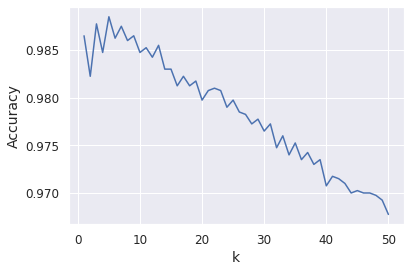

In [15]:
plt.plot(parameters['n_neighbors'],
         grid.cv_results_['mean_test_score'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

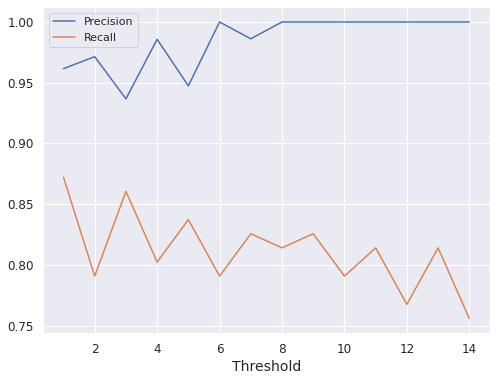

In [16]:
# Manually create a precision-recall plot
ks = range(1, 15)
precisions = []
recalls = []

for k in ks:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train_5)
    y_pred_5 = knn_clf.predict(X_test)
    precisions += [precision_score(y_test_5, y_pred_5)]
    recalls += [recall_score(y_test_5, y_pred_5)]

plt.subplots(figsize=(8, 6))
plt.plot(ks, precisions)
plt.plot(ks, recalls)
plt.xlabel('Threshold')
plt.legend(['Precision', 'Recall'])
plt.show()

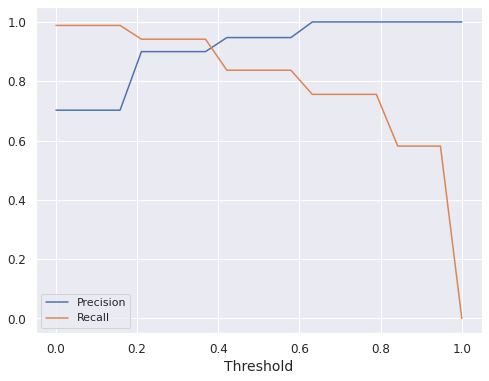

In [17]:
# Use optimized value of k
k_best = grid.best_params_['n_neighbors']

knn_clf = KNeighborsClassifier(n_neighbors=k_best)
knn_clf.fit(X_train, y_train_5)

# Manually create a precision-recall plot for the test data
y_score = knn_clf.predict_proba(X_test)[:, 1]

# Range of thresholds for assigning an instance to the positive class (5)
thresholds = np.linspace(0.0, 1.0, num=20)

precisions = []
recalls = []
for t in thresholds:
    y_pred = (y_score > t)
    precisions += [precision_score(y_test_5, y_pred,
                                   zero_division=1)]
    recalls += [recall_score(y_test_5, y_pred)]

plt.subplots(figsize=(8, 6))
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.xlabel('Threshold')
plt.legend(['Precision', 'Recall'])
plt.show()

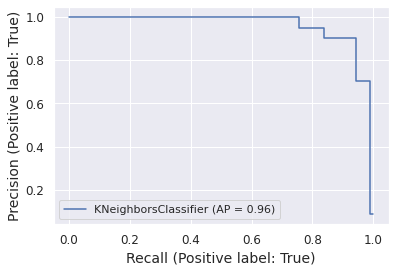

In [18]:
# Use sklearn to create a precision-recall plot
PrecisionRecallDisplay.from_estimator(knn_clf, X_test, y_test_5)
plt.show()

In [19]:
# Fit k-Nearest Neighbors model for the multiclass problem with k = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.93

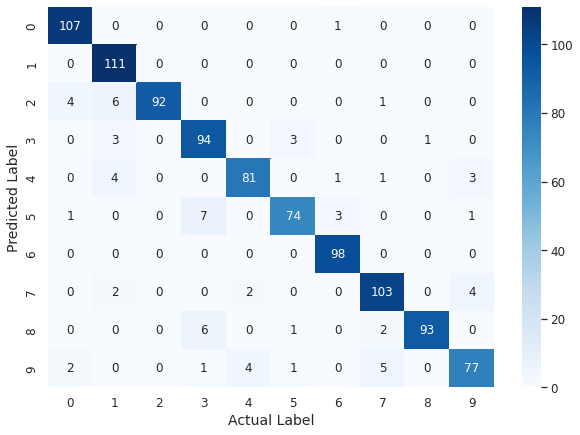

In [20]:
# Visualize performance with a confusion matrix
dfcm = pd.DataFrame(confusion_matrix(y_test, y_pred))

plt.figure(figsize = (10, 7))
sns.heatmap(dfcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

In [22]:
knn = KNeighborsClassifier()

# define the parameter grid to search over
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# perform the grid search
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

# print the best value of k and the corresponding score
print("Best value of k: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best value of k:  {'n_neighbors': 1}
Best score:  0.9372
